In [1]:
from IPython import get_ipython


In [2]:
# Wide set of imports
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
# import pandas as pd
# import scipy as sp
# import seaborn as sb
# import scipy.signal as signal
# from astropy.io import fits
# from astropy import units as u
from astroquery.mast import Observations as Obs
from astropy.io import fits
from astropy.table import Table
import glob
from astroquery.mast import Observations as Obs


In [3]:
import urllib
import tarfile

from sys import path as system_path
# system_path.append('/Users/nkerman/Software/quickScripts/')
import natpy

system_path.append('/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products')
from coadd import COSSegmentList, STISSegmentList, FUSESegmentList, CCDSegmentList
from coadd import abut


 The source is [VFTS 72 *AKA* BI 253](https://simbad.u-strasbg.fr/simbad/sim-id?Ident=BI+253&submit=submit+id)

In [4]:
!mkdir -p ./zipdata ./extracted_data ./processed_data

In [5]:
ull_data_dl_path = 'https://ullyses.stsci.edu/files/vfts72.tar.gz'
zip_data_path, headers = urllib.request.urlretrieve(ull_data_dl_path, './zipdata/vfts72')

print(f"Downloaded zipped ULLYSES data files to {zip_data_path}")

Downloaded zipped ULLYSES data files to ./zipdata/vfts72


In [6]:
tar = tarfile.open(zip_data_path, "r:gz")
tar.extractall('./extracted_data/')
tar.close()

datadir = './extracted_data/vfts72/'

In [7]:
allexposures = glob.glob(datadir+'*x1d*')+glob.glob(datadir+'*vo*')



In [8]:
for efile in allexposures:
    prihdr = fits.getheader(efile)
    tab = Table.read(efile)
    print(prihdr['TELESCOP'],prihdr['INSTRUME'], "\t: ", len(tab), '\trows of data')


# # %%
# ! /Users/nkerman/miniconda3/envs/astroconda/bin/python /Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/wrapper.py -i ./extracted_data/vfts72/ -o ./processed_data/vfts72/output1


# # %%
# Table.read('./NatTest/vfts72/output2/hlsp_ullyses_hst-fuse_fuse-cos-stis_vfts72_uv_dr2_sed.fits')



HST COS 	:  2 	rows of data
HST COS 	:  2 	rows of data
HST COS 	:  2 	rows of data
HST COS 	:  2 	rows of data
HST STIS 	:  40 	rows of data
HST COS 	:  2 	rows of data
HST STIS 	:  40 	rows of data
HST STIS 	:  40 	rows of data
HST COS 	:  2 	rows of data
HST COS 	:  2 	rows of data
HST COS 	:  2 	rows of data
HST STIS 	:  40 	rows of data
FUSE FUV 	:  1 	rows of data


In [9]:
def simple_plot(filename, ext = 0, ls = '-'):
    tab = Table.read(filename)[ext]
    wvln, flux = tab['WAVELENGTH'], tab['FLUX']
    plt.xlabel("Wavelength [$\AA$]")
    plt.ylabel("Flux $[ergs/s/cm^2/\AA]$")
    plt.plot(wvln,flux, label = os.path.basename(filename), linestyle=ls)



In [10]:
# simple_plot('./NatTest/vfts72/output2/hlsp_ullyses_hst-fuse_fuse-cos-stis_vfts72_uv_dr2_sed.fits')
fflist[0].prihdr['TAR*']

NameError: name 'fflist' is not defined

In [11]:
extract_dir = './extracted_data/vfts72/'
fplist = glob.glob(extract_dir+'*x1d*')
fflist = [natpy.fitsfile.fitsfile(fpath) for fpath in fplist]

In [12]:
[print(ff.vitalstats) for ff in fflist]

['lda930fbq_x1d.fits', 'COS', 'FUV', 'G160M', 1589, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['lda930fdq_x1d.fits', 'COS', 'FUV', 'G160M', 1589, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['lda930fnq_x1d.fits', 'COS', 'FUV', 'G130M', 1291, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['lda930fhq_x1d.fits', 'COS', 'FUV', 'G130M', 1291, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['oda929010_x1d.fits', 'STIS', 'NUV-MAMA', 'E230M', 1978, None, 'ACCUM', None]
['lda930f9q_x1d.fits', 'COS', 'FUV', 'G160M', 1589, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['oda929040_x1d.fits', 'STIS', 'NUV-MAMA', 'E230M', 1978, None, 'ACCUM', None]
['oda929020_x1d.fits', 'STIS', 'NUV-MAMA', 'E230M', 1978, None, 'ACCUM', None]
['lda930ffq_x1d.fits', 'COS', 'FUV', 'G160M', 1589, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['lda930flq_x1d.fits', 'COS', 'FUV', 'G130M', 1291, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['lda930fjq_x1d.fits', 'COS', 'FUV', 'G130M', 1291, 3, 'TIME-TAG', 'EXTERNAL/SCI']
['oda929030_x1d.fits', 'STIS', 'NUV-MAMA', 'E230M', 1978, None, 'ACCUM', None]


[None, None, None, None, None, None, None, None, None, None, None, None]

In [13]:
g130_ex = 'lda930fhq_x1d.fits'
g160_ex = 'lda930fdq_x1d.fits'
g130_exA = Table.read(extract_dir + g130_ex)[0]
g130_exB = Table.read(extract_dir + g130_ex)[1]
g160_exA = Table.read(extract_dir + g160_ex)[0]
g160_exB = Table.read(extract_dir + g160_ex)[1]

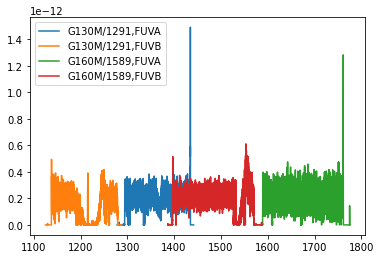

In [14]:
# Here is the data we want to eventually coadd and abut.
plt.plot(g130_exA['WAVELENGTH'], g130_exA['FLUX'], label = 'G130M/1291,FUVA')
plt.plot(g130_exB['WAVELENGTH'], g130_exB['FLUX'], label = 'G130M/1291,FUVB')
plt.plot(g160_exA['WAVELENGTH'], g160_exA['FLUX'], label = 'G160M/1589,FUVA')
plt.plot(g160_exB['WAVELENGTH'], g160_exB['FLUX'], label = 'G160M/1589,FUVB')

plt.legend()

In [54]:
prod_g130 = COSSegmentList('G130M', path = extract_dir)
prod_g130.create_output_wavelength_grid()
prod_g130.coadd()
prod_g130.target = prod_g130.ull_targname(alias_dir='/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/')
prod_g130.write('/Users/nkerman/Desktop/prod_g130.fits', overwrite=True)

./extracted_data/vfts72/lda930fnq_x1d.fits added to file list for grating G130M
./extracted_data/vfts72/lda930fhq_x1d.fits added to file list for grating G130M
./extracted_data/vfts72/lda930flq_x1d.fits added to file list for grating G130M
./extracted_data/vfts72/lda930fjq_x1d.fits added to file list for grating G130M
/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/coadd.py:507: RuntimeWarning: invalid value encountered in true_divide
  thru_nans = segment.data['net'] / segment.data['flux']


In [55]:
prod_g160 = COSSegmentList('G160M', path = extract_dir)
prod_g160.create_output_wavelength_grid()
prod_g160.coadd()
prod_g160.target = prod_g160.ull_targname(alias_dir='/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/')
prod_g160.write('/Users/nkerman/Desktop/prod_g160.fits', overwrite=True)

./extracted_data/vfts72/lda930fbq_x1d.fits added to file list for grating G160M
./extracted_data/vfts72/lda930fdq_x1d.fits added to file list for grating G160M
./extracted_data/vfts72/lda930f9q_x1d.fits added to file list for grating G160M
./extracted_data/vfts72/lda930ffq_x1d.fits added to file list for grating G160M
/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/coadd.py:507: RuntimeWarning: invalid value encountered in true_divide
  thru_nans = segment.data['net'] / segment.data['flux']


In [56]:
abutted_prod = abut(prod_g130,prod_g160)
abutted_prod.write('/Users/nkerman/Desktop/g130g160.fits', overwrite=True)

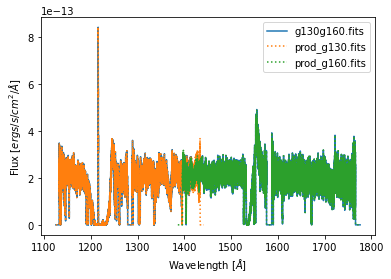

In [18]:
for i,f in enumerate(glob.glob('/Users/nkerman/Desktop/*0.fits')):
    simple_plot(f, ls = '-::'[i])
plt.legend()
plt.savefig('delete.png', dpi = 300)


In [19]:
read_in_abutted = Table.read('/Users/nkerman/Desktop/g130g160.fits')[0]

The transition wavelength auto-chosen was around 1414.714599609375 with sampling 0.0185546875


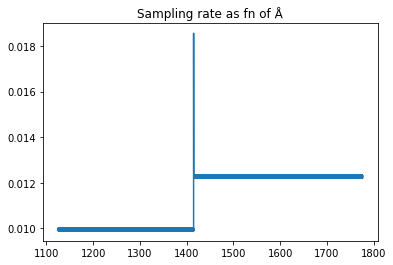

In [20]:
wvln, sampling = read_in_abutted['WAVELENGTH'][1:],np.diff(read_in_abutted['WAVELENGTH'])
plt.plot(wvln, sampling)
plt.title("Sampling rate as fn of Å")

print(f"The transition wavelength auto-chosen was around {wvln[np.argmax(sampling)]} with sampling {sampling[np.argmax(sampling)]}")

In [21]:
abutted_prod = abut(prod_g130,prod_g160, transition_wavelength = 1420)
abutted_prod.write('/Users/nkerman/Desktop/g130g160_manual_tw.fits', overwrite=True)
read_in_abutted = Table.read('/Users/nkerman/Desktop/g130g160_manual_tw.fits')[0]

The transition wavelength user-chosen was around 1420.00439453125 with sampling 0.02392578125


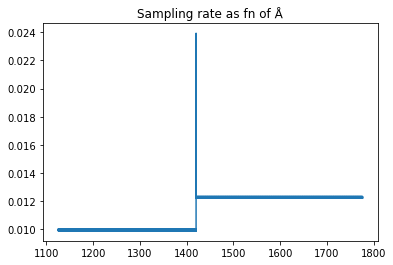

In [22]:
wvln, sampling = read_in_abutted['WAVELENGTH'][1:],np.diff(read_in_abutted['WAVELENGTH'])
plt.plot(wvln, sampling)
plt.title("Sampling rate as fn of Å")

print(f"The transition wavelength user-chosen was around {wvln[np.argmax(sampling)]} with sampling {sampling[np.argmax(sampling)]}")

In [23]:
l = []
for i,f in enumerate(glob.glob('/Users/nkerman/Desktop/*130g160*.fits')):
    # simple_plot(f, ls = '--:'[i])
    w, f = Table.read(f)[0]['WAVELENGTH','FLUX']
    l.append([w,f])
# plt.legend()
# plt.savefig('delete.png', dpi = 300)

If we want to see which wavelengths differ between the two abutted files (we expect it to be between the default and the chosen value,) we can interpolate to the same wavelenth scale, and subtract one from the other.

1414.7146 1419.9922


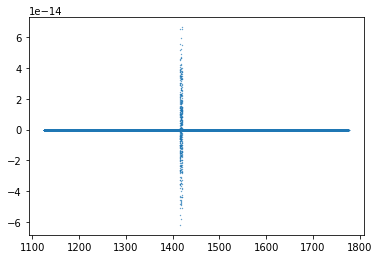

In [24]:
differ_wvlns = l[0][0][np.where(l[0][1] - np.interp(l[0][0], l[1][0],l[1][1])!= 0)]
print(min(differ_wvlns),max(differ_wvlns))
plt.scatter(l[0][0],l[0][1] - np.interp(l[0][0], l[1][0],l[1][1]), s = 0.1)

(1414.7146, 1419.9922)

In [25]:
pl = Obs.filter_products(Obs.get_product_list(Obs.query_criteria(obs_id = 'LBK620010')),
 productSubGroupDescription = 'X1D')
dl = Obs.download_products(pl)['Local Path']
if not os.path.isdir('./extracted_data/others'):
    os.mkdir('./extracted_data/others')
for d in dl:
    shutil.move(d, f'./extracted_data/others/{os.path.basename(d)}')

In [26]:
prod_g185 = COSSegmentList('G185M', path = './extracted_data/others')
prod_g185.create_output_wavelength_grid()
prod_g185.coadd()
prod_g185.target = prod_g185.ull_targname(alias_dir='/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/')
prod_g185.write('/Users/nkerman/Desktop/prod_g185.fits', overwrite=True)

./extracted_data/others/lbk620zcq_x1d.fits added to file list for grating G185M
./extracted_data/others/lbk620zeq_x1d.fits added to file list for grating G185M
/Users/nkerman/Projects/ullyses_dp/high_level_science_products/high_level_science_products/coadd.py:507: RuntimeWarning: invalid value encountered in true_divide
  thru_nans = segment.data['net'] / segment.data['flux']


In [62]:
abutted_prod = abut(abutted_prod, prod_g185)
abutted_prod.write('/Users/nkerman/Desktop/g130g160g185_manual_tw.fits', overwrite=True)
read_in_abutted = Table.read('/Users/nkerman/Desktop/g160g185_manual_tw.fits')[0]

Trying to abut spectra from 2 different targets:
VFTS72 and 103P-HARTLEY-2


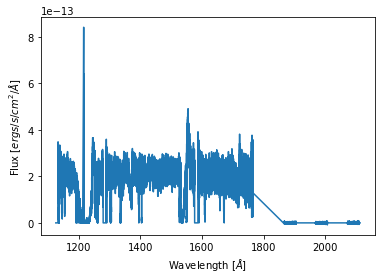

In [63]:
simple_plot('/Users/nkerman/Desktop/g130g160g185_manual_tw.fits')
# simple_plot('/Users/nkerman/Desktop/g160g185_manual_tw.fits')